# Final Inclass competition for Rolling Scopes School ML intro course

link: https://www.kaggle.com/c/rss-top-performers-prediction/overview

The goal of the competition is to predict whether a student is likely to become a top performer by the end of the course. Data set contains information about students, courses and tasks.

The dataset consists of information about students taking RSS courses. Along with students information there are supplementary files with courses, tasks and task results.

File descriptions
train.csv - the training set of students
test.csv - the test set of students
sampleSubmission.csv - a sample submission file in the correct format
course.csv - supplemental information about the courses
task.csv - supplemental information about the tasks
task_results.csv - supplemental information about the results of tasks

### Imports

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score, make_scorer, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [4]:
# Load given files as dataframes
train = pd.read_csv(os.path.join('E:', 'Downloads', 'rss-top-performers-prediction', 'train.csv'))
test = pd.read_csv(os.path.join('E:', 'Downloads', 'rss-top-performers-prediction', 'test.csv'))
course = pd.read_csv(os.path.join('E:', 'Downloads', 'rss-top-performers-prediction', 'course.csv'))
task_results = pd.read_csv(os.path.join('E:', 'Downloads', 'rss-top-performers-prediction', 'task_results.csv'))
sample = pd.read_csv(os.path.join('E:', 'Downloads', 'rss-top-performers-prediction', 'sampleSubmission.csv'))
task = pd.read_csv(os.path.join('E:', 'Downloads', 'rss-top-performers-prediction', 'task.csv'))

In [5]:
# Concat test and train dataframes for EDA
df = train.append(test)

In [6]:
train[train['courseId'] == 14].sample(10)

,studentId,createdDate,updatedDate,isExpelled,expellingReason,courseCompleted,isTopPerformer,preferedMentorGithubId,readyFullTime,courseId,userId,mentorId,cvUrl,hiredById,hiredByName,isFailed,startDate,endDate,repository,repositoryLastActivityDate,idUser,educationHistory,englishLevel
1808,8879,2019-10-24 10:08:59.204968,2020-01-20 07:55:00.19662,f,NaN,f,False,NaN,NaN,14,812,NaN,NaN,NaN,NaN,f,1970-01-01 00:00:00+00,NaN,NaN,NaN,812,"[{""graduationYear"":""2007"",""faculty"":""economic""...",a2
1822,8890,2019-10-24 10:08:59.373882,2020-01-10 21:20:00.214045,f,NaN,f,True,NaN,NaN,14,4978,NaN,NaN,NaN,NaN,f,1970-01-01 00:00:00+00,NaN,NaN,NaN,4978,[],NaN
1796,8891,2019-10-24 10:08:59.387194,2020-01-10 20:10:00.221308,f,NaN,f,False,NaN,NaN,14,1097,NaN,NaN,NaN,NaN,f,1970-01-01 00:00:00+00,NaN,NaN,NaN,1097,"[{""graduationYear"":""2012"",""faculty"":""Информаци...",a2
1795,8884,2019-10-24 10:08:59.28022,2019-12-19 14:30:00.265567,f,NaN,f,False,NaN,NaN,14,682,NaN,NaN,NaN,NaN,f,1970-01-01 00:00:00+00,NaN,NaN,NaN,682,"[{""graduationYear"":""2022"",""faculty"":""Informati...",b1
1797,8893,2019-10-24 10:08:59.413834,2020-01-10 21:15:00.237118,f,NaN,f,False,NaN,NaN,14,5808,NaN,NaN,NaN,NaN,f,1970-01-01 00:00:00+00,NaN,NaN,NaN,5808,[],NaN
1799,8876,2019-10-24 10:08:59.161884,2020-01-20 07:55:00.19662,f,NaN,f,False,NaN,NaN,14,5779,NaN,NaN,NaN,NaN,f,1970-01-01 00:00:00+00,NaN,NaN,NaN,5779,[],NaN
1789,8887,2019-10-24 10:08:59.322619,2020-01-20 07:55:00.19662,f,NaN,f,True,NaN,NaN,14,660,NaN,NaN,NaN,NaN,f,1970-01-01 00:00:00+00,NaN,NaN,NaN,660,"[{""graduationYear"":""2019"",""faculty"":""Computer ...",a2
1788,8892,2019-10-24 10:08:59.400931,2020-01-20 07:55:00.19662,f,NaN,f,True,NaN,NaN,14,5083,NaN,NaN,NaN,NaN,f,1970-01-01 00:00:00+00,NaN,NaN,NaN,5083,[],NaN
1806,8886,2019-10-24 10:08:59.309068,2020-01-20 07:55:00.19662,f,NaN,f,False,NaN,NaN,14,5586,NaN,NaN,NaN,NaN,f,1970-01-01 00:00:00+00,NaN,NaN,NaN,5586,[],NaN
1824,8878,2019-10-24 10:08:59.191008,2020-01-10 21:20:00.214045,f,NaN,f,False,NaN,NaN,14,1240,NaN,NaN,NaN,NaN,f,1970-01-01 00:00:00+00,NaN,NaN,NaN,1240,"[{""graduationYear"":""2018"",""faculty"":""Computer-...",a2


In [8]:
task[task['courseTaskId'] == 4].head(2)

,taskId,createdDate,updatedDate,name,descriptionUrl,description,verification,githubPrRequired,useJury,allowStudentArtefacts,githubRepoName,sourceGithubRepoUrl,type,tags,discipline,attributes,courseTaskId,createdDateCourseTask,updatedDateCourseTask,mentorStartDate,mentorEndDate,maxScore,stageId,scoreWeight,checker,taskOwnerId,studentStartDate,studentEndDate,courseId,pairsCount,typeCourseTask,disabled,createdDateCourse,updatedDateCourse,nameCourse,year,primarySkillId,primarySkillName,locationName,alias,completed,descriptionCourse,descriptionUrlCourse,planned,courseStartDate,courseEndDate,fullName,registrationEndDate,inviteOnly
211,84,2019-04-26 14:55:46.426978,2020-02-10 18:45:57.803066,"HTML, CSS & Git Basics",https://github.com/rolling-scopes-school/tasks...,NaN,auto,f,f,f,NaN,NaN,cv:html,stage1,NaN,{},4,2019-04-29 17:48:16.581645,2019-05-17 08:07:10.051843,NaN,NaN,NaN,1.0,0.2,mentor,NaN,NaN,2019-03-12 21:00:00+00,1,NaN,NaN,f,2019-04-17 11:41:21.396686,2019-09-09 16:15:18.068023,RS 2019 Q1,2019.0,javascript,JavaScript,Minsk,rs-2019-q1,t,Rolling Scopes School 2018 Q1,https://github.com/rolling-scopes-school/lectures,f,2019-01-01 00:49:13.461+00,2019-08-25 00:49:13.461+00,Rolling Scopes School 2019 Q1,NaN,f


In [9]:
task_results[task_results['courseTaskId'] == 4].sample(2)

,createdDate,updatedDate,score,comment,studentId,courseTaskId,historicalScores,juryScores,checkerId,anonymous
34645,2019-05-17 10:14:45.406427,2019-05-17 10:14:45.406427,55,NaN,392,4,"[{""authorId"":0,""score"":55,""dateTime"":155808808...",[],NaN,NaN
17601,2019-05-15 18:06:30.478357,2019-05-15 18:06:30.478357,90,NaN,100,4,"[{""authorId"":2277,""score"":""90"",""dateTime"":1557...",[],NaN,NaN


### EDA

In [6]:
def explore_plot(col):
    """Create bar plot to compare shares distribution"""
    fig, ax = plt.subplots()
    plt.title(col)
    plt.bar(df[df['isTopPerformer'] == False].groupby(col).size().index, height=df[df['isTopPerformer'] == False].groupby(col).size(),
           label = 'Failers', color='grey')
    plt.bar(df[df['isTopPerformer'] == False].groupby(col).size().index, height=df[df['isTopPerformer'] == True].groupby(col).size(), 
            bottom=df[df['isTopPerformer'] == False].groupby(col).size(), label='Toppers', color='orange')
    plt.legend(loc='best')
    plt.show()
    print(f"Percentage of Toppers:\n{df[df['isTopPerformer'] == True][col].value_counts() / df[col].value_counts()}")

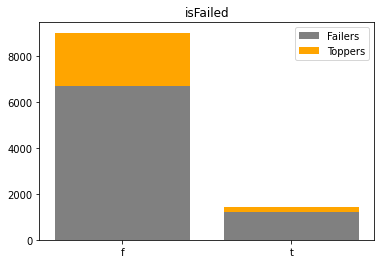

Percentage of Toppers:
f    0.194812
t    0.164460
Name: isFailed, dtype: float64


In [7]:
explore_plot('isFailed')

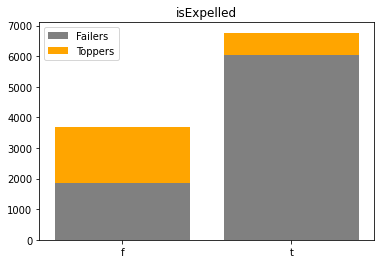

Percentage of Toppers:
f    0.274167
t    0.109913
Name: isExpelled, dtype: float64


In [8]:
explore_plot('isExpelled')

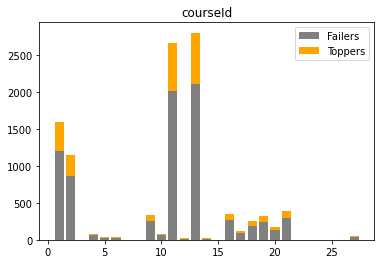

Percentage of Toppers:
1     0.212466
2     0.209373
4     0.206186
5     0.222222
6     0.214286
9     0.202020
10    0.195652
11    0.209094
12    0.190476
13    0.209940
14    0.208333
16    0.190024
17    0.208633
18    0.217666
19    0.206186
20    0.216346
21    0.215385
23    0.333333
27    0.193548
28         NaN
29         NaN
Name: courseId, dtype: float64


In [10]:
explore_plot('courseId')

### Make more features

Calculate max score for the course where it's not given

In [12]:
student_results = task_results.groupby(['studentId', 'courseTaskId'], as_index=False)['score'].mean().\
merge(task[['courseTaskId', 'maxScore', 'scoreWeight', 'courseId']], on='courseTaskId', how='left')

# Calculate true max score
max_score = student_results[student_results['maxScore'].isna()].groupby('courseTaskId')['score'].max().reset_index().rename(columns={'score':'max_score'})
student_results = student_results.merge(max_score, on='courseTaskId', how='left')
student_results['veryMaxScore'] = student_results['maxScore'].fillna(0) + student_results['max_score'].fillna(0)

# Manual fixes
student_results.loc[student_results['courseId'] == 19, 'veryMaxScore'] = student_results.loc[student_results['courseId'] == 19, 'veryMaxScore'] / student_results['scoreWeight']
student_results = student_results[student_results['courseTaskId'] != 143]
student_results['score_cleared'] = student_results.apply(lambda row: row['veryMaxScore'] if row['score'] > row['veryMaxScore'] else row['score'], axis=1)

And calculate student performance as % of top student and % of max score for the course

In [13]:
# Calculate max scores and make new dataframe
student_results['weighted_score'] = student_results['score_cleared'] * student_results['scoreWeight']
course_max_score = student_results.groupby(['courseId', 'studentId'])['veryMaxScore'].sum().reset_index().groupby('courseId')['veryMaxScore'].max().reset_index()
course_topper = student_results.groupby(['courseId', 'studentId'])['weighted_score'].sum().reset_index().groupby('courseId')['weighted_score'].max().reset_index()

student_performance = student_results.groupby(['studentId', 'courseId'])[['score', 'weighted_score']].sum().reset_index()
student_performance = student_performance.merge(course_max_score.rename(columns={'veryMaxScore':'course_max'}), on='courseId', how='left')
student_performance = student_performance.merge(course_topper.rename(columns={'weighted_score':'top_student'}), on='courseId', how='left')

student_performance['of_max'] = student_performance['score'] / student_performance['course_max']
student_performance['of_top'] = student_performance['weighted_score'] / student_performance['top_student']

In [14]:
# To calculate student lifetime (time spent of total course length), get the course len
course['len'] = (pd.to_datetime(course['courseEndDate']) - pd.to_datetime(course['courseStartDate'])).dt.total_seconds().astype(int)

In [15]:
# Calculate mentor quality as number of student taught
mentor = train.groupby('mentorId')['studentId'].nunique().reset_index().rename(columns={'studentId':'mentorQuality'})

Create function to add new features

In [16]:
def features(df):
    # Has previos education
    df['educationHistoryLabel'] = df['educationHistory'].apply(len)
    df['educationHistoryLabel'] = df['educationHistoryLabel'].apply(lambda x: 0 if x <= 62 else 1)  # 62: visual analysis of the form
    
    # English level labeled
    df['englishLevelLabel'] = df['englishLevel'].str.lower().str.strip().str.split(' ').str[0].str.replace('+', '')
    df.loc[df['englishLevelLabel'].isna(), 'englishLevelLabel'] = 'no'
    df.loc[df['englishLevelLabel'].str.contains('pre-intermedia'), 'englishLevelLabel'] = 'a2'
    df.loc[df['englishLevelLabel'].str.contains('intermedia'), 'englishLevelLabel'] = 'b1'
    df.loc[df['englishLevelLabel'].str.contains('upper_intermedia'), 'englishLevelLabel'] = 'b2'
    df.loc[df['englishLevelLabel'].str.contains('advanced'), 'englishLevelLabel'] = 'c2'
    df.loc[df['englishLevelLabel'].str.contains('intermidiate'), 'englishLevelLabel'] = 'b1'
    df['englishLevelLabel'] = df['englishLevelLabel'].str.split('-').str[0].str.strip()
    labels = ['a0', 'a1', 'a2', 'b1', 'b2', 'c1', 'c2', 'no']
    df.loc[~df['englishLevelLabel'].isin(labels), 'englishLevelLabel'] = 'other'

    mapper = {'no': 0, 'a0': 2, 'a1': 3, 'a2': 4, 'b1': 5, 'b2': 6, 'c1': 7, 'c2': 8, 'other': 1}
    df['englishLevelLabel'] = df['englishLevelLabel'].map(mapper).astype(int)

    # Has repository
    df['repositoryLabel'] = df['repository'].notna() * 1

    # Label isFailed and isExpelled
    mapper = {'f': 0, 't': 1}
    df['isExpelled'] = df['isExpelled'].map(mapper)
    df['isFailed'] = df['isFailed'].map(mapper)

    # Add information about marks
    df = df.merge(task_results.groupby(['studentId'])['score'].agg(['mean', 'sum']).reset_index(), on='studentId', how='left')
    df = df.merge(course[['courseId', 'primarySkillId']], on='courseId', how='left')
    df.loc[df['mean'].isna(), 'mean'] = 0
    df.loc[df['sum'].isna(), 'sum'] = 0
    
    # Map by the course theme
    mapper = {'javascript': 0, 'ios-obj-c': 1, 'nodejs': 2, 'android-kotlin': 3}
    df['primarySkillLabel'] = df['primarySkillId'].map(mapper).astype(int)

    # Add student lifetime for each course    
    df = df.merge(course[['courseId', 'len']], on='courseId', how='left')
    df['lifetime'] = (pd.to_datetime(df['updatedDate']) - pd.to_datetime(df['createdDate'])).dt.total_seconds().astype(int)
    df['lifetime'] = df['lifetime'] / df['len']
    
    # Expelling reason label
    df['expellingReasonLabel'] = df['expellingReason'].notna() * 1
    
    # Mentor Quality
    df = df.merge(mentor, on='mentorId', how='left')
    df.loc[(df['mentorQuality'].isna()) & (df['mentorId'].notna()), 'mentorQuality'] = 1
    df.loc[df['mentorQuality'].isna(), 'mentorQuality'] = 0
    
    # Performance
    df = df.merge(student_performance[['studentId', 'courseId', 'of_top', 'of_max']], on=['studentId', 'courseId'], how='left') 
    df.loc[df['of_top'].isna(), 'of_top'] = 0
    df.loc[df['of_max'].isna(), 'of_max'] = 0
    
    id_ = df['studentId']
    X = df[['isExpelled', 'courseId', 'isFailed', 'educationHistoryLabel', 'mentorQuality', 'expellingReasonLabel',
            'englishLevelLabel', 'repositoryLabel', 'mean', 'sum', 'primarySkillLabel', 'lifetime', 'of_top', 'of_max']]
    if 'isTopPerformer' in df.columns:
        y = df['isTopPerformer']
    else: 
        y = 0

    return id_, y, X

In [17]:
train_id, y_train, X_train = features(train)

In [18]:
X_train.sample(10)

,isExpelled,courseId,isFailed,educationHistoryLabel,mentorQuality,expellingReasonLabel,englishLevelLabel,repositoryLabel,mean,sum,primarySkillLabel,lifetime,of_top,of_max
8934,1,13,0,0,0.0,1,0,0,0.000000,0.0,0,0.851285,0.000000,0.000000
3637,1,1,1,1,0.0,0,4,0,0.000000,0.0,0,0.000000,0.000000,0.000000
3008,0,13,0,0,2.0,0,4,1,123.235294,8380.0,0,1.025506,0.827937,0.809752
1733,1,1,1,1,0.0,0,3,0,0.000000,0.0,0,0.000000,0.000000,0.000000
7627,1,1,1,0,0.0,0,3,0,0.000000,0.0,0,0.000000,0.000000,0.000000
10214,1,13,0,1,0.0,1,5,0,86.500000,1557.0,0,0.813596,0.043252,0.213734
10132,1,13,0,0,0.0,1,7,0,75.000000,150.0,0,1.091050,0.000813,0.026964
2806,0,21,0,0,0.0,0,0,0,117.526316,2233.0,2,2.638675,0.811270,0.811000
9283,1,13,0,0,0.0,1,0,0,0.000000,0.0,0,1.131993,0.000000,0.000000
10093,1,13,0,0,0.0,1,0,1,68.758621,1994.0,0,0.800035,0.085269,0.236635


Visualize correlations

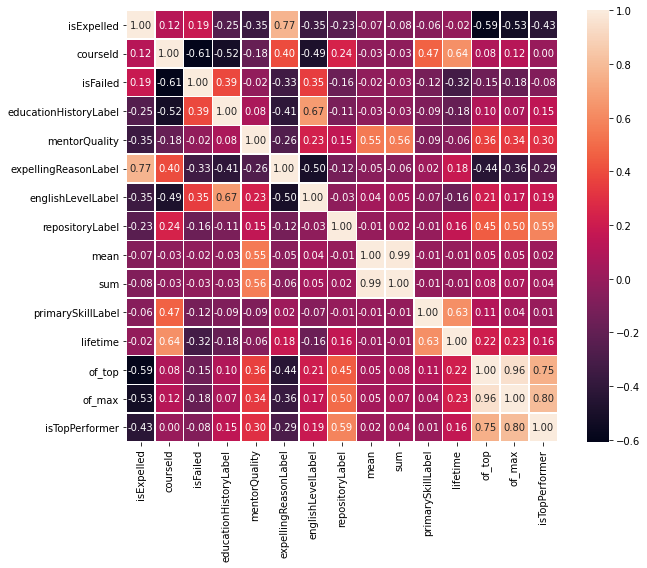

In [19]:
import seaborn as sns
df = X_train.merge(y_train, left_index=True, right_index=True)

fig, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

### Creating Pipeline

In [20]:
test_id, y_test, X_test = features(test)

Normalized gini coef as main metric

In [21]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

gini_score = make_scorer(gini_normalized)

In [22]:
# Cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [23]:
num_trees = range(1, 40, 1)
rfc_param_grid = {'n_estimators': num_trees,
                 'criterion': ['entropy', 'gini'],
                 'max_depth': range(1, 35, 1),
                 'min_samples_split': range(2, 30, 1),
                 'min_samples_leaf': range(2, 30, 1)}


rfc_random = RandomizedSearchCV(RandomForestClassifier(random_state=13, n_jobs=-1), 
                       rfc_param_grid,  cv=cv, scoring='f1')
rfc_random_result = rfc_random.fit(X_train, y_train)
best_rfcr_parameters = rfc_random_result.best_params_
rfcr_score = rfc_random_result.best_score_

print('Best params:', best_rfcr_parameters)
print('Best score:', rfcr_score)

Best params: {'n_estimators': 32, 'min_samples_split': 12, 'min_samples_leaf': 11, 'max_depth': 14, 'criterion': 'entropy'}
Best score: 0.9793972842121171


In [24]:
knn_param_grid = {'n_neighbors': range(4, 8, 1)}

knn = GridSearchCV(KNeighborsClassifier(n_jobs=-1), knn_param_grid, cv=cv, scoring='f1')
knn_result = knn.fit(X_train, y_train)
best_knn_parameters = knn_result.best_params_
knn_score = knn_result.best_score_

print('Best params:', best_knn_parameters)
print('Best score:', knn_score)

Best params: {'n_neighbors': 5}
Best score: 0.8539245273437673


In [25]:
estimators = [('rf', rfc_random), ('knn', knn)]
model = StackingClassifier(estimators=estimators, cv=10)

In [26]:
%%time
clf = Pipeline(steps=[('scaler', StandardScaler()), ('classifier', model)]).fit(X_train, y_train)

Wall time: 5min 58s


In [27]:
clf.score(X_train, y_train)

0.9955114124725433

In [28]:
gini_normalized(clf.predict(X_train), y_train)

0.9862532623067543

In [29]:
clf.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 StackingClassifier(cv=10,
                                    estimators=[('rf',
                                                 RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                                                                    estimator=RandomForestClassifier(n_jobs=-1,
                                                                                                     random_state=13),
                                                                    param_distributions={'criterion': ['entropy',
                                                                                                       'gini'],
                                                                                         'max_depth': range(1, 35),
                                                                             

### Prediction

In [32]:
y_pred = clf.predict(X_test)

In [ ]:
test_id = pd.DataFrame(test_id)
test_id['isTopPerformer'] = y_pred

# 13 clf + new features 
test_id.to_csv(str(dt.datetime.now()) + "_result.csv", index=False, header=True)